In [223]:
import numpy as np
import matplotlib.pyplot as plt
import ROOT
import array
import pandas as pd

In [224]:
fs_tdc = 512 #ns
V_dw = 2290 #V
delay = 220 #ns
t_dw = 540 #ns
t_dw_delay = 200 #ns
t_up = 430 #ns
t_up_single = 210 #ns

In [225]:
V_up  = [2000,2050,2100,2150,2200,2250,2275,2300,2350,2400]
time = [400,400,380,350,300,260,250,240,200,100]
coinc = [323,874,1482,1876,1770,1671,1693,1757,2283,1145]
single_up = [1219,3930,11250,20268,29173,43442,59562,146107,487753,336689]
single_dw = [357330,356796,388742,363695,308106,273048,243383,250170,234702,95917]
N_tdc = [320,855,1431,1780,1696,1567,1570,1589,1881,874]

In [226]:
rate_coinc = np.array(coinc)/np.array(time)
rate_tdc = np.array(N_tdc)/np.array(time)
print(rate_coinc)
print(rate_tdc)

[ 0.8075      2.185       3.9         5.36        5.9         6.42692308
  6.772       7.32083333 11.415      11.45      ]
[0.8        2.1375     3.76578947 5.08571429 5.65333333 6.02692308
 6.28       6.62083333 9.405      8.74      ]


In [227]:
a = 1.053
b =62

In [313]:
#Se volessimo considerare le casuali
casuali = np.array(single_up)/np.array(time)*np.array(single_dw)/np.array(time)*(t_up + t_dw)*10**(-9)
print(casuali)

[2.64073570e-03 8.50088770e-03 2.93777498e-02 5.83692176e-02
 9.68747228e-02 1.70205602e-01 2.24983790e-01 6.15538898e-01
 2.77605766e+00 3.13253728e+00]


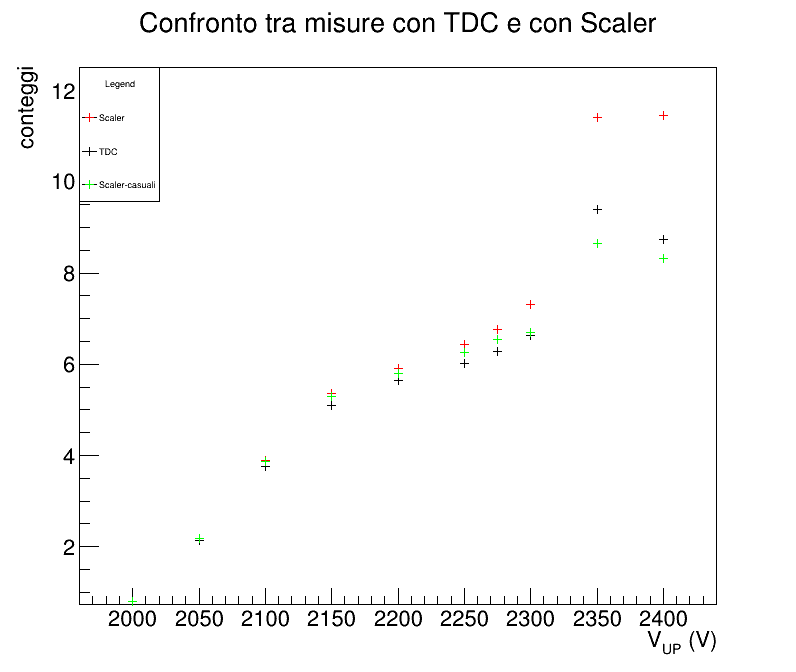

In [311]:
c1 = ROOT.TCanvas("", "", 800,700)
g1  = ROOT.TGraph(len(V_up), array.array("f", V_up), array.array("f", rate_coinc))
g2 = ROOT.TGraph(len(V_up), array.array("f", V_up), array.array("f", rate_tdc))
g3 = ROOT.TGraph(len(V_up), array.array("f", V_up), array.array("f", rate_coinc-casuali))

g1.SetTitle("Confronto tra misure con TDC e con Scaler")
g1.GetXaxis().SetTitle("V_{UP} (V)")
g1.GetYaxis().SetTitle("conteggi")

g1.SetMarkerStyle(2)
g2.SetMarkerStyle(2)
g1.SetMarkerColor(2)
g2.SetMarkerColor(1)
g3.SetMarkerColor(3)
g3.SetMarkerStyle(2)

Leg = ROOT.TLegend(0.1,0.7,0.2,0.9)
Leg.SetHeader("Legend","C")
Leg.AddEntry(g1, "Scaler")
Leg.AddEntry(g2, "TDC")
Leg.AddEntry(g3,"Scaler-casuali")
g1.Draw("AP")
g2.Draw("SAMEP")
g3.Draw("SAMEP")
Leg.Draw("SAME")
c1.Draw()

Ora vogliamo vedere come cambia la risoluzione temporale al variare della tensione. Costruiamo le gaussiane e ci prendiamo la FWMH


In [229]:
def dati_tdc(fname):
    f = open(fname, "r")
    lines = f.read().split("\n")
    d1 = {}
    num  = 0 
    Events = []
    for i in range(4,len(lines)-4,4):
        event = []
        line1 = lines[i]. split("\t")
        #print(line1)
        line2 = lines[i+1].split("\t")
        line3 = lines[i+2].split("\t")
        line4 = lines[i+3].split("\t")
        col  = [int(line1[0]), int(line2[0]), int(line3[0]), int(line4[0])]
        event.append(col)
        Events.append(col)
        d1[num] = event
        num += 1
    return Events, d1

In [230]:
Events = []
for i in V_up:
    fname = "cal_up_dw/" + str(i) + ".txt"
    event, d1 = dati_tdc(fname)
    Events.append(event)

#Events

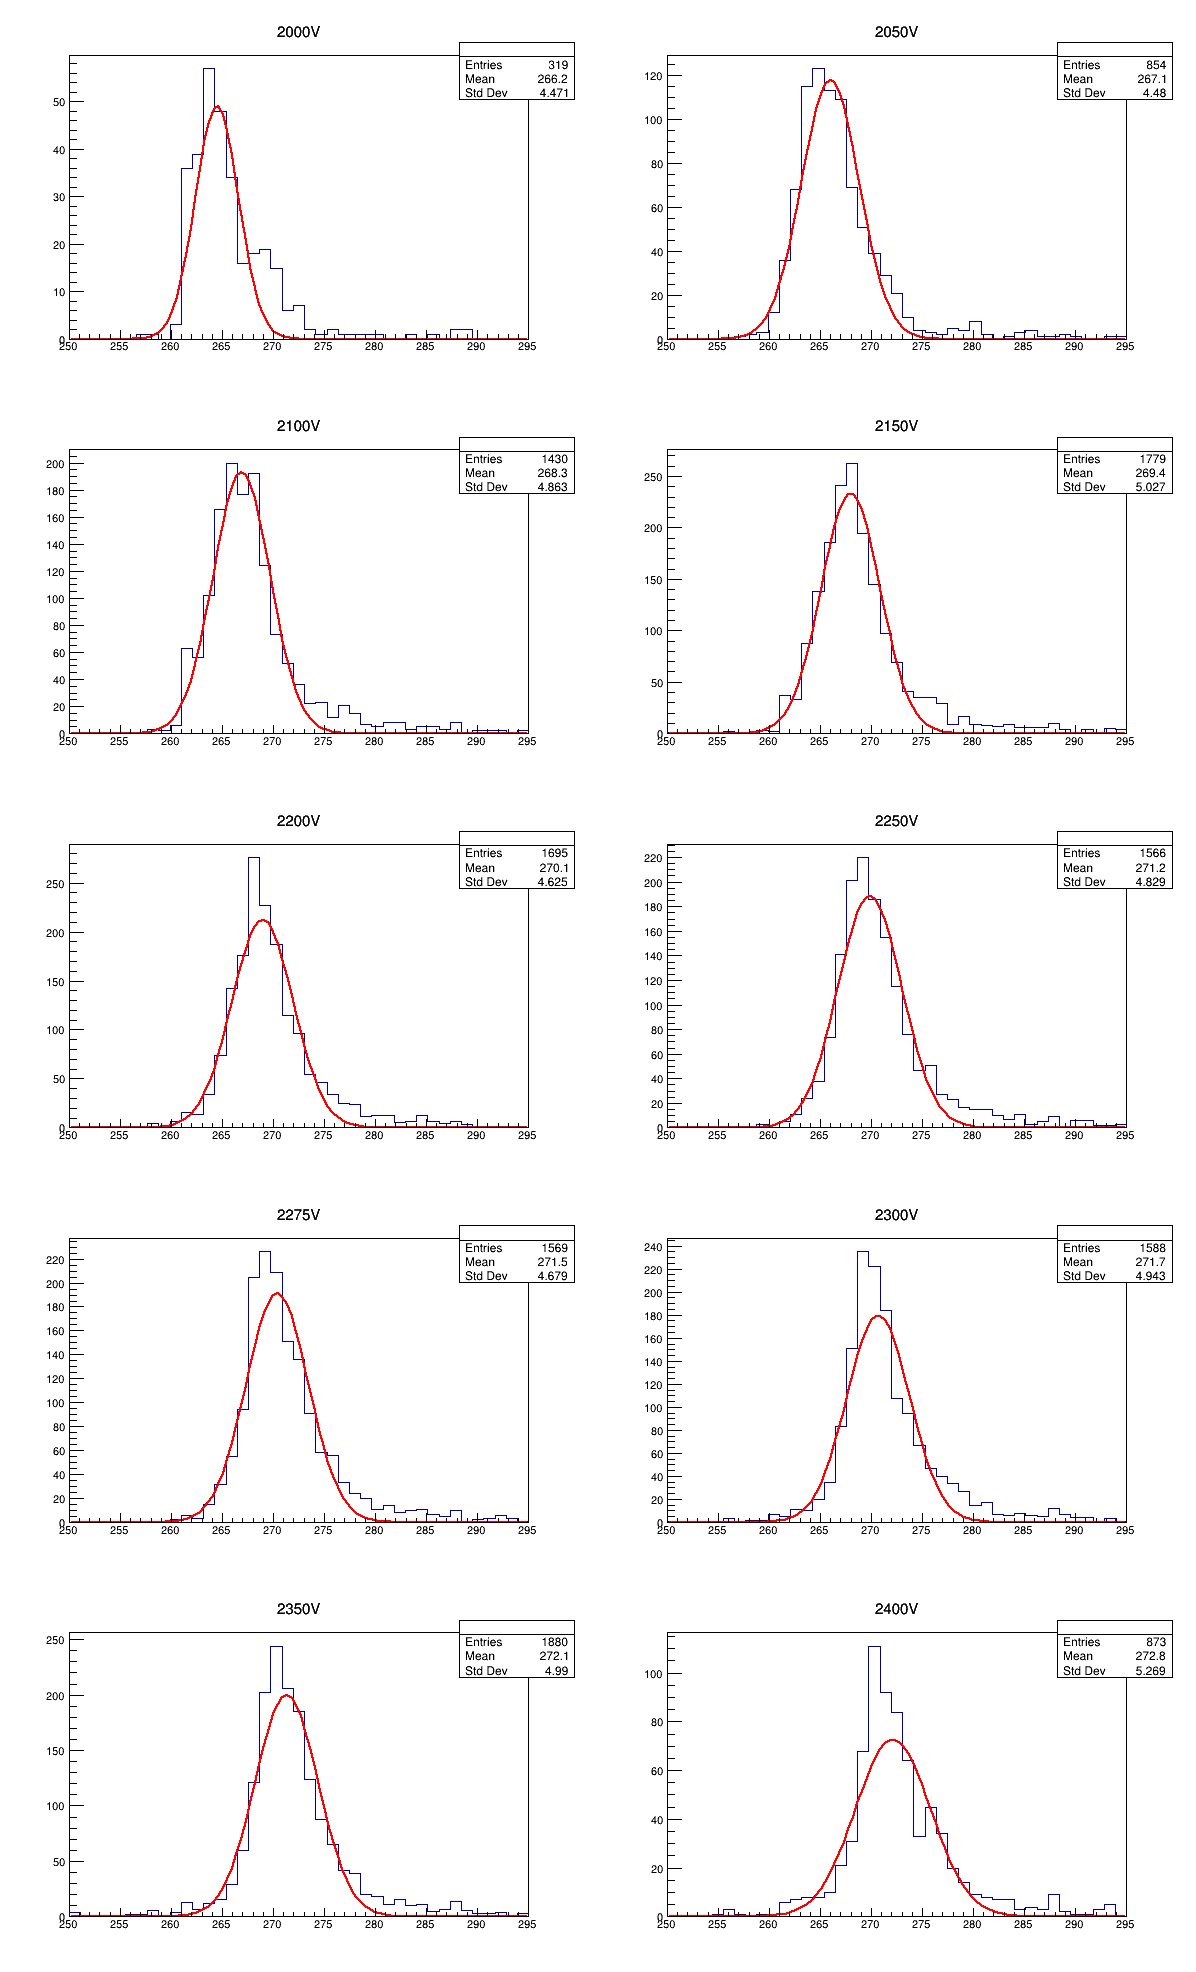

In [288]:
c = list(np.zeros(10))
j = 1
h = list(np.zeros(10))
f1 = ROOT.TF1( "f", "gaus")
c = ROOT.TCanvas("","",1200,2000)
c.Divide(2,5)
c.Draw()

mean_dt = []
std_dt = []
mean_err = []
std_err = []

for i in range(len(V_up)):
    data =[]
    for m in Events[i]:
        data.append(m[3])
    #print(np.array(data)*a)
    Data = np.array(data)*a + b
    h[i] = ROOT.TH1F("", "",41,250,295)
    for k in Data:
        h[i].Fill(k)
    h[i].SetTitle(str(V_up[i]) + "V")
    c.cd(j)
    h[i].Draw()
    #f1.SetParameters(1000, np.mean(Data), np.std(Data))
    h[i].Fit(f1, "Q")
    mean_dt.append(f1.GetParameter(1))
    std_dt.append(abs(f1.GetParameter(2)))
    mean_err.append(f1.GetParError(1))
    std_err.append(f1.GetParError(2))
    j+=1


In [289]:
fwhm = 2.355 * np.array(std_dt)

fwhm_err = 2.355 * np.array(std_err)


In [290]:
#fwhm = np.array(fwhm)*a + b

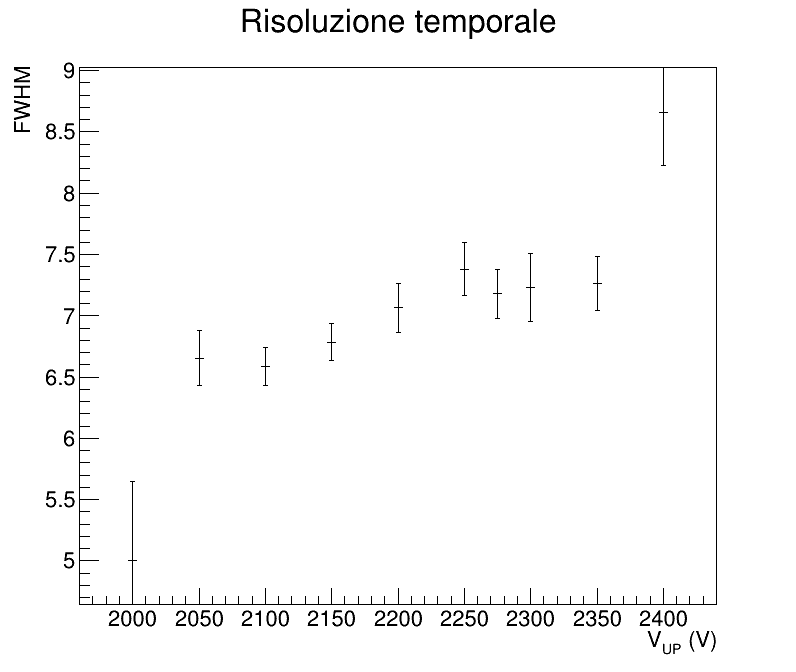

In [291]:
c1 = ROOT.TCanvas("","", 800,700)
g1 = ROOT.TGraph(len(fwhm), array.array("f", V_up), array.array("f", fwhm))
g2 = ROOT.TGraphErrors(len(fwhm), array.array("f", V_up), array.array("f", fwhm),
                      array.array("f", len(V_up)*[0]), array.array("f", fwhm_err))
g1.GetYaxis().SetTitle("FWHM")
g1.SetTitle("Risoluzione temporale")
g1.GetXaxis().SetTitle("V_{UP} (V)")
g1.SetMarkerStyle(2)
g1.Draw("AP")
g2.Draw("SAMEP")
c1.Draw("AP")

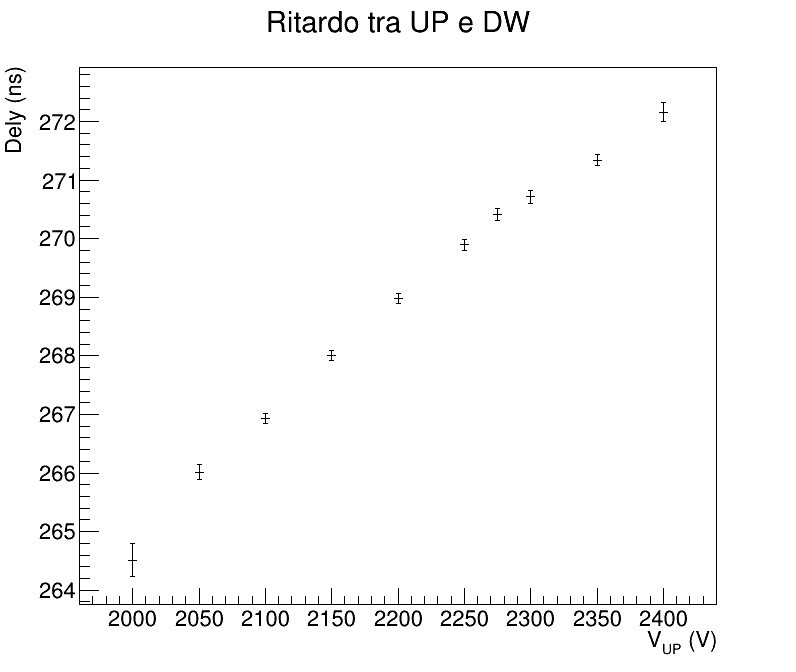

In [292]:
c1 = ROOT.TCanvas("","", 800,700)
g1 = ROOT.TGraph(len(fwhm), array.array("f", V_up), array.array("f", mean_dt))
g2 = ROOT.TGraphErrors(len(fwhm), array.array("f", V_up), array.array("f", mean_dt),
                      array.array("f", len(V_up)*[0]), array.array("f", mean_err))
g1.GetYaxis().SetTitle("Dely (ns)")
g1.SetTitle("Ritardo tra UP e DW")
g1.GetXaxis().SetTitle("V_{UP} (V)")
g1.SetMarkerStyle(2)
g1.Draw("AP")
g2.Draw("SAMEP")
c1.Draw("AP")